# 1차원 칼만필터

In [17]:

def measurement_update(estimated_mean, estimated_var, measurement_mean, measurement_var) :
    new_mean = (measurement_var*estimated_mean + estimated_var*measurement_mean) / (estimated_var + measurement_var)
    new_var = estimated_var*measurement_var/(estimated_var + measurement_var)
    
    return new_mean, new_var

def state_prediction(estimated_mean, estimated_var, motion_control_mean, motion_control_var) :
    new_mean = estimated_mean + motion_control_mean
    new_var = estimated_var + motion_control_var
    return new_mean, new_var


In [18]:
measurements = [5, 6, 7, 9, 10]
measurement_var = 4

motion_controls = [1, 1, 2, 1, 1]
motion_control_var = 2

mu = 0
sig = 1000


for i in range(len(measurements)) :
    
    mu, sig = state_prediction(mu,sig, motion_controls[i], motion_control_var)
    print("predict : [%f %f]"%(mu,sig))
    
    mu, sig = measurement_update(mu,sig, measurements[i], measurement_var)
    print("update : [%d %d]"%(mu, sig))
    
    
    

predict : [1.000000 1002.000000]
update : [4 3]
predict : [5.984095 5.984095]
update : [5 2]
predict : [7.993628 4.397451]
update : [7 2]
predict : [8.473300 4.094660]
update : [8 2]
predict : [9.739730 4.023388]
update : [9 2]


# 다차원 칼만필터

In [3]:
import numpy as np


def kalman_filter(mu, sig) :
    for n, measurement in enumerate(measurements) :
        # prediction
        
        mu_bar = A*mu + B*u
        sig_bar = A*sig*A.transpose()
        
        #kalman gain
        
        s = C*sig_bar*C.transpose() + Q
        K = sig_bar*C.transpose() * np.linalg.inv(s)
        
        #measurement update
        
        z = np.matrix([[measurement]])
        mu = mu_bar + K*(z-C*mu_bar)
        #sig = (I - K*C)*sig_bar
        sig = sig_bar*(I - C*K)
        
    return mu,sig


In [4]:
measurements = [1, 2, 3, 4, 5]

mu = np.matrix([[0.],[0.]])
sig = np.matrix([[1000., 0.],
                [0., 1000.]])


u = np.matrix([[0.],[0.]])
A = np.matrix([[1., 1.],
             [0., 1.]])

C = np.matrix([[1., 0.]])
Q = np.matrix([[1.]])
I = np.eye(2)
B = np.eye(2)

print(kalman_filter(mu,sig))







(matrix([[ 4.9999962],
        [ 0.8596245]]), matrix([[-27977.96046149, -44967.6818635 ],
        [ -4995.95289954,  -7994.04801485]]))


# 가우시안 분포의 합??

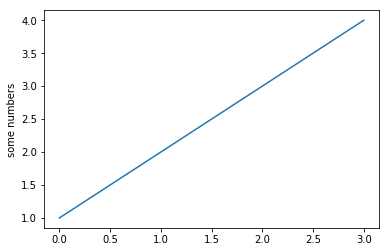

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [22]:

def my_gaussian(mu,u,sig) :
    
    return 1/np.sqrt(2*np.pi*(sig**2))*np.exp(-((mu-u)**2)/(2*(sig**2)))


def my_gaussian_sum(mu,u1,sig1,u2,sig2) :
    
    new_mean = (u1*(sig2**2) + u2*(sig1**2)) / (sig1**2 + sig2**2)
    new_var = ((sig1**2)*(sig2**2))/(sig1**2 + sig2**2)
                                              
    return 1/np.sqrt(2*np.pi*new_var)*np.exp(-(mu-new_mean)**2/(2*new_var))

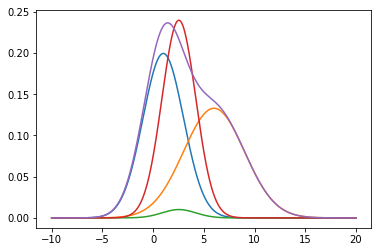

In [63]:
u1 = 1
sig1 = 2


u2 = 6
sig2 = 3

t = np.arange(-10, 20, 0.001)
r1 = my_gaussian(t,u1,sig1)
r2 = my_gaussian(t,u2,sig2)
r3 = r1*r2
r4 = my_gaussian_sum(t,u1,sig1,u2,sig2)


plt.plot(t,r1)
plt.plot(t,r2)
plt.plot(t,r3)
plt.plot(t,r4)

plt.show()

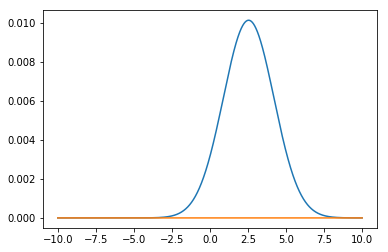

In [61]:

r5 = r4*my_gaussian(u1,u2,np.sqrt(sig1**2 + sig2**2))

plt.plot(t,r5)
plt.plot(t,r5-r3)

plt.show()

베이시안 해석이 들어가야 해석이 가능하겠군....

아마도 recursive Bayes estimation?? or filter??

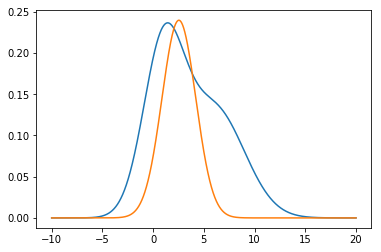

In [65]:

plt.plot(t,r1+r2)
plt.plot(t,r4)

plt.show()